<a href="https://colab.research.google.com/github/marcel1710/TwitterBot/blob/main/TwitterBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# https://www.youtube.com/watch?v=ujId4ipkBio

In [39]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')


from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import WordPunctTokenizer

import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from google.colab import files


In [31]:
file = 'credentials.csv'
credentials= pd.read_csv(file)

In [25]:
api_key = credentials['Key'][0]
api_secretkey = credentials['Key'][1]
access_key = credentials['Key'][2]
access_secretkey = credentials['Key'][3]

In [26]:
authenticate = tweepy.OAuthHandler(api_key, api_secretkey)
authenticate.set_access_token(access_key, access_secretkey)
api = tweepy.API(authenticate, wait_on_rate_limit=True) 

In [133]:
posts = api.search(q ='#AAPL', count = 10000, lang = "en", tweet_mode="extended")

print("Last 5 posts: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ')'+ tweet.full_text + '\n')
    i = i+1


Last 5 posts: 

1)Bad news for Tesla.... #TSLA #AAPL

https://t.co/PuIleSA3f7

2)@BarrySchwartzBW Wow! What beautiful menu reading from my beautiful phone #AAPL 😀

3)1000+ Pips Profit in 12 days🔥❤️🚀

Get Daily Forex Signals at https://t.co/BYOBMuefiO

#stocks #forex #bitcoin #SPX #PIPS #SP500 #S&amp;P500 #BTC #crudeoil #xauusd #xagusd #amzn #aapl #SPY #ES_F #fx #usoil 15020 https://t.co/VRJiMl1P2U

4)#AAPL - This is your day , to see the profit  - TradingView - https://t.co/WaiCvx8g1I

5)RT @cryptoexp76258C: #AUDCAD Both TPs hit! 70 Pips Profit✅🔥

For Free signals, Join https://t.co/PXLBnt0aio

#forex #aapl #SP500 #fx #S&amp;P50…



In [134]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])
df.head()

,Tweets
0,Bad news for Tesla.... #TSLA #AAPL\n\nhttps://...
1,@BarrySchwartzBW Wow! What beautiful menu read...
2,1000+ Pips Profit in 12 days🔥❤️🚀\n\nGet Daily ...
3,"#AAPL - This is your day , to see the profit ..."
4,RT @cryptoexp76258C: #AUDCAD Both TPs hit! 70 ...


In [135]:
#cleaning text
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    only_alphanumeric = re.sub('[^a-zA-Z0-9]', ' ', user_removed)
    lower_case_tweet = only_alphanumeric .lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

df['Tweets'] = df['Tweets'].apply(clean_tweets)
df.head()


,Tweets
0,bad news for tesla tsla aapl https t co puiles...
1,wow what beautiful menu reading from my beauti...
2,1000 pips profit in 12 days get daily forex si...
3,aapl this is your day to see the profit tradin...
4,rt audcad both tps hit 70 pips profit for free...


In [136]:
#removing stopwords
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Tweets
0,bad news tesla tsla aapl https co puilesa3f7
1,wow beautiful menu reading beautiful phone aapl
2,1000 pips profit 12 days get daily forex signa...
3,aapl day see profit tradingview https co waicv...
4,rt audcad tps hit 70 pips profit free signals ...


In [74]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

bad news tesla tsla aapl https co puilesa3f7 wow beautiful menu reading beautiful phone aapl 1000 pips profit 12 days get daily forex signals https co byobmuefio stocks forex bitcoin spx pips sp500 amp p500 btc crudeoil xauusd xagusd amzn aapl spy es f fx usoil 15020 https co vrjiml1p2u aapl day see profit tradingview https co waicvx8g1i rt audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p50 audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p500 es f usoil dow bitcoin btc spy pips xauusd spx crudeoil djia stocks 88866 https co hr65w0mxpu apple come apps replace facebook instagram whatsapp make available ios fb would toast aapl resources greater good humanity cook aapl merryxmaszuck buy aapl tsla audcad tps hit 70 pips profit get daily forex signals https co pxlnmadudo nasdaq xauusd fx aapl silver dji btc chfjpy bitcoin gold stocks usoil ger30 dax30 crudeoil forex nzdusd 14627 https co tfynn8qd8i audca

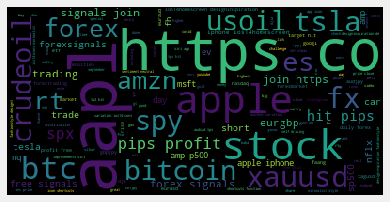

In [148]:
df_string['Tweets'] = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df_string['Tweets'])
print(wc_text)

cloud = wordcloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()

# We see that https is part of the our wordcloud, we want to remove it as should be stopword

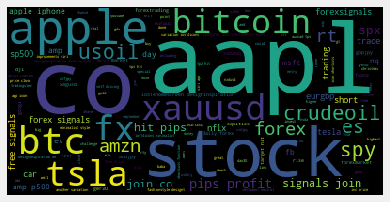

In [156]:
#all_stopwords =['https'] + list(stopwords)
stopwords = list(stop) + ['https']
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_string['Tweets'] = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df_string['Tweets'])


cloud = wordcloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()


In [140]:
def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,bad news tesla tsla aapl https co puilesa3f7,0.666667,-0.7
1,wow beautiful menu reading beautiful phone aapl,1.000000,0.6
2,1000 pips profit 12 days get daily forex signa...,0.000000,0.0
3,aapl day see profit tradingview https co waicv...,0.000000,0.0
4,rt audcad tps hit 70 pips profit free signals ...,0.800000,0.4


In [ ]:
#Wordcloud

In [141]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,bad news tesla tsla aapl https co puilesa3f7,0.666667,-0.7,Negative
1,wow beautiful menu reading beautiful phone aapl,1.000000,0.6,Positive
2,1000 pips profit 12 days get daily forex signa...,0.000000,0.0,Neutral
3,aapl day see profit tradingview https co waicv...,0.000000,0.0,Neutral
4,rt audcad tps hit 70 pips profit free signals ...,0.800000,0.4,Positive


In [55]:
#sortiert und print positiv
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) rt audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p50

2) audcad tps hit 70 pips profit free signals join https co pxlbnt0aio forex aapl sp500 fx amp p500 es f usoil dow bitcoin btc spy pips xauusd spx crudeoil djia stocks 88866 https co hr65w0mxpu

3) apple come apps replace facebook instagram whatsapp make available ios fb would toast aapl resources greater good humanity cook aapl merryxmaszuck

4) apple potentially coming electric car tesla currently dominating industry legacy brand automakers stand chance transitioning successfully ev space apple tesla aapl tsla timcook elonmusk ev https co 3osvufrtts

5) 1000 pips profit 12 days join free signals https co 5ixqzbzq65 audjpy stocks xauusd forextrading usoil gbpjpy nflx forexsignals eurgbp forex btc aapl bitcoin fx euraud crudeoil forexmarket 64293 https co wjieiqfmzw

6) would engineer prefer work apple tesla higher salary tsla aapl

7) rt epic comment well done freeing cash well sales

In [ ]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [ ]:
percentage_positive = df[df.Analysis =='Positive']
percentage_positive = percentage_positive['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1))+"% are positive tweets")


In [ ]:
percentage_negative = df[df.Analysis =='Negative']
percentage_negative = percentage_negative['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1))+"% are negative tweets")

In [ ]:
percentage_neutral = 100 - round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1) -round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1)
percentage_neutral = str(round(percentage_neutral , 2))
print(percentage_neutral + "% are neutral tweets")

<function matplotlib.pyplot.show>

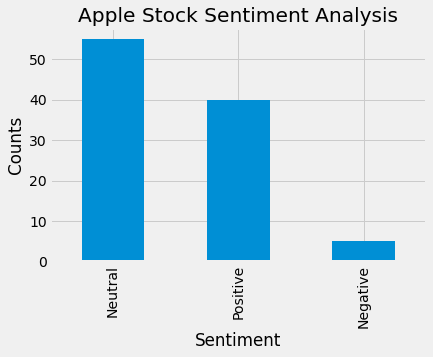

In [142]:
df['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show

In [ ]:
# Tweepy kann nur Tweets finden die max. eine Woche alt sind. Funktioniert dafür mit GetOldTweets3: https://github.com/Jefferson-Henrique/GetOldTweets-python
!pip install GetOldTweets3
import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#AAPL')\
                                           .setSince("2015-05-01")\
                                           .setUntil("2015-09-30")\
                                           .setMaxTweets(1)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)[0]
print(tweet.text)

#gibt aber nen fehler: TypeError: object of type 'NoneType' has no len() aus jupyter